#### DSC550-T301 
##### Chitramoy Mukherjee
##### Week-11
##### Date: 2/19/2024

### Exercise - 11

####  Load the MNIST data set.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models


# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Print the shape of the datasets
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Testing images shape:", test_images.shape)
print("Testing labels shape:", test_labels.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


#### Display the first five images in the training data set.Compare these to the first five training labels.

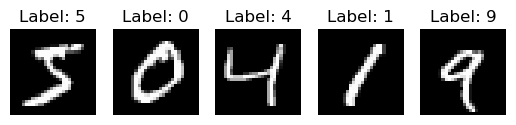

In [10]:
# Display the first five images
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

#### Build and train a Keras CNN classifier on the MNIST training set.Report the test accuracy of your model.

In [6]:
# Reshape the images to add a channel dimension (for CNN)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


C:\Users\14024\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.9044 - loss: 0.3193 - val_accuracy: 0.9838 - val_loss: 0.0500
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.9848 - loss: 0.0485 - val_accuracy: 0.9899 - val_loss: 0.0302
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9905 - loss: 0.0295 - val_accuracy: 0.9883 - val_loss: 0.0351
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9926 - loss: 0.0226 - val_accuracy: 0.9903 - val_loss: 0.0296
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9951 - loss: 0.0158 - val_accuracy: 0.9892 - val_loss: 0.0336
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9879 - loss: 0.0390
Test accuracy: 0.9891999959945679


#### Display a confusion matrix on the test set classifications.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


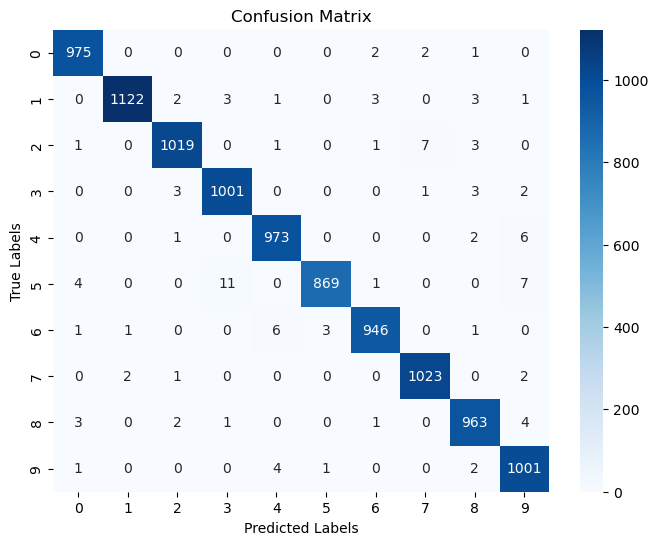

In [8]:
# Get predictions for the test set
predictions = np.argmax(model.predict(test_images), axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

# Display confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


The provided code trains a Convolutional Neural Network (CNN) classifier on the MNIST dataset. Here's a summary of the key components and results:

1.  Model Architecture:

    1.Two convolutional layers with ReLU activation.
    2.Max-pooling layers to downsample the spatial dimensions.
    3.A fully connected layer with ReLU activation.
    4.Output layer with softmax activation for 10 classes.
    
2. Training Data:

    1.MNIST dataset with 60,000 training images and 10,000 test images.
    2.Images normalized to have pixel values between 0 and 1.

3. Training Procedure:

    1.Adam optimizer used for training.
    2.Sparse categorical crossentropy used as the loss function.
    3.Model trained for 5 epochs.

Results:
    
The confusion matrix provides a detailed view of the performance of a classification model. It consists of a grid where each row represents the actual class, and each column represents the predicted class.

Diagonal Elements (True Positives): The values on the diagonal of the matrix represent the number of instances where the model correctly predicted the class. In the context of MNIST digits, these values represent the true positives for each digit.

Off-Diagonal Elements (Misclassifications): Values off the diagonal indicate misclassifications. For example, if there is a value in the row corresponding to digit '3' and the column corresponding to digit '8', it means that instances of digit '3' were misclassified as digit '8'.

Row Summation (Actual Class): The sum of values in each row represents the total number of instances for that actual class.

Column Summation (Predicted Class): The sum of values in each column represents the total number of instances predicted for that class.

Visual Interpretation: A heat map is often used to visualize the confusion matrix, where darker colors represent higher values. This can make it easier to identify patterns of misclassifications.

confusion matrix is to understand which digits are frequently misclassified and to assess the overall accuracy and reliability of your CNN model on the MNIST test set. Adjustments to the model or further exploration may be warranted based on the insights gained from the confusion matrix.